In [1]:
import glob
import pandas as pd
import seaborn as sns
import bidirec_script

In [2]:
np_new = pd.read_csv('../SPREAD_food_networks/np/networks/apr1_app1_b2_k500/1.edges')
print(np_new['weight'].describe())
print(np_new.groupby('month').count())

count    3980.000000
mean       53.618612
std       186.503434
min         0.010264
25%         0.266875
50%         2.474428
75%        18.277926
max      3428.049498
Name: weight, dtype: float64
       source_name  target_name  weight
month                                  
1              321          321     321
2              321          321     321
3              321          321     321
4              321          321     321
5              380          380     380
6              184          184     184
7              184          184     184
8              401          401     401
9              401          401     401
10             401          401     401
11             424          424     424
12             321          321     321


In [3]:
for i in range(1, 13):
    output = 'data/out_np_new_delta_{num}.csv'.format(num=i)
    bidirec_script.doStuff(sf='../SPREAD_food_networks/np/networks/apr1_app1_b2_k500/1.edges', sci=0, dci=1, tci=3, sp=',', d=i, pd=12, of=output)

In [4]:
dfs = []
# read in the files just generated
for name in glob.glob('data/out_np_new_delta_?*.csv'):
    graphnp = pd.read_csv(name)
    dfs.append(graphnp)
# and add them all to the same dataframe for analysis
dfs = pd.concat(dfs)

<AxesSubplot:xlabel='t1', ylabel='count'>

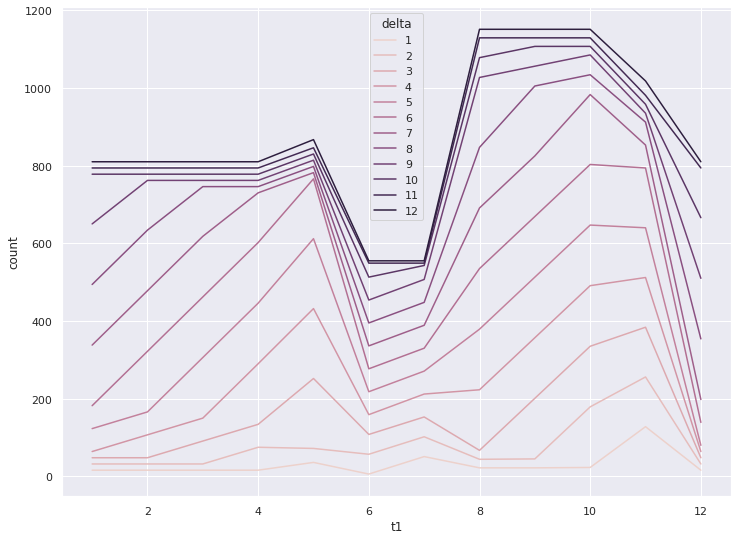

In [6]:
df = dfs[['t1', 'count', 'delta']].groupby(['t1', 'delta']).sum().reset_index()
sns.set(rc={'figure.figsize':(12,9)})
sns.lineplot(data=df, x='t1', y='count', hue='delta', legend='full')